# Aprendizaje automático relacional

In [1]:
# Configurando las variables de entorno
%env NX_CUGRAPH_AUTOCONFIG=True

env: NX_CUGRAPH_AUTOCONFIG=True


In [2]:
# Librerias

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
# import cugraph as cg # networkx on gpu

https://www.kaggle.com/datasets/rozemberczki/musae-github-social-network/data

In [3]:
# Datos
edges = pd.read_csv("../data/musae_git_edges.csv")
features = pd.read_csv("../data/musae_git_features.csv")
target = pd.read_csv("../data/musae_git_target.csv")

In [4]:
edges.head()

,id_1,id_2
0,0,23977
1,1,34526
2,1,2370
3,1,14683
4,1,29982


In [5]:
features.head()

,node,feature
0,0,1574
1,0,3773
2,0,3571
3,0,2672
4,0,2478


In [6]:
target.head()

,id,name,ml_target
0,0,Eiryyy,0
1,1,shawflying,0
2,2,JpMCarrilho,1
3,3,SuhwanCha,0
4,4,sunilangadi2,1


## EDA

### Construcción del grafo

In [7]:
G = nx.from_pandas_edgelist(edges,'id_1','id_2')

### Métricas del grafo

Distribución de grados

             degree
count  37700.000000
mean      15.331724
std       80.788102
min        1.000000
25%        2.000000
50%        6.000000
75%       13.000000
max     9458.000000


<Axes: ylabel='Count'>

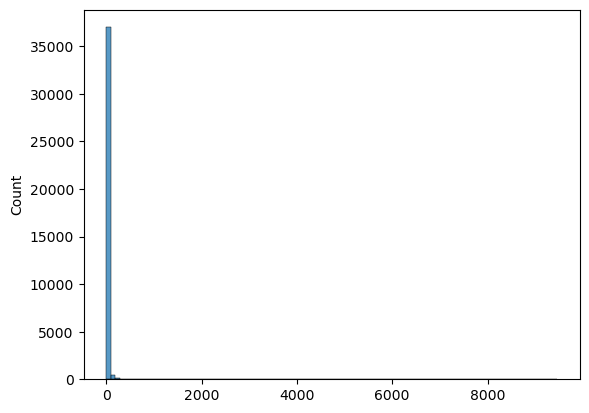

In [8]:
degrees = [G.degree(n) for n in G.nodes()]
print(pd.DataFrame(degrees,columns=["degree"]).describe())
sns.histplot(degrees,bins=100)

Distribución de clustering

         clustering
count  37700.000000
mean       0.167537
std        0.225168
min        0.000000
25%        0.000000
50%        0.100000
75%        0.226316
max        1.000000


<Axes: ylabel='Count'>

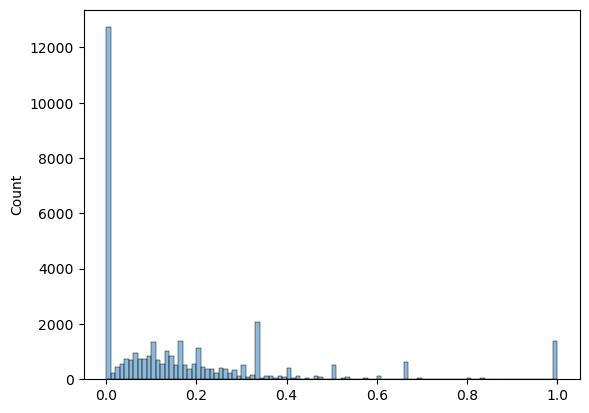

In [9]:
clustering = nx.clustering(G)
print(pd.DataFrame.from_dict(clustering,orient="index",columns=["clustering"]).describe())
sns.histplot(clustering.values(),bins=100,legend=False)

Clustering medio

In [10]:
global_cluster = nx.average_clustering(G, count_zeros=True)
global_cluster

0.16753704480107584

Centralidad betweennes

         clustering
count  3.770000e+04
mean   5.958963e-05
std    1.949917e-03
min    0.000000e+00
25%    4.495291e-08
50%    1.529294e-06
75%    1.728025e-05
max    2.695983e-01


<Axes: ylabel='Count'>

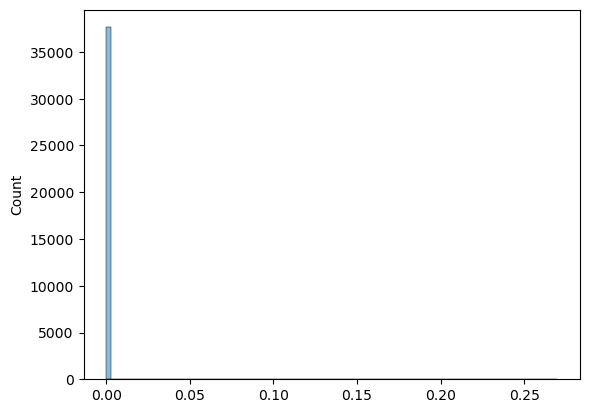

In [11]:
betweenness = nx.betweenness_centrality(G)
print(pd.DataFrame.from_dict(betweenness,orient="index",columns=["clustering"]).describe())
sns.histplot(betweenness.values(),bins=100,legend=False)

Centralidad closeness

         clustering
count  37700.000000
mean       0.313667
std        0.040806
min        0.141389
25%        0.284141
50%        0.311260
75%        0.346949
max        0.523081


<Axes: ylabel='Count'>

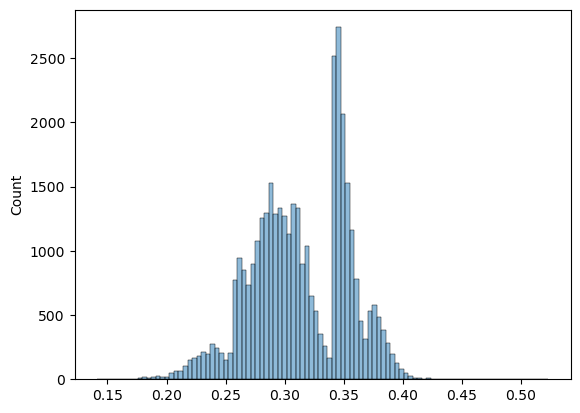

In [13]:
closeness = nx.closeness_centrality(G) # Reciproco de la distancia media de un nodo a todos los demás
print(pd.DataFrame.from_dict(closeness,orient="index",columns=["clustering"]).describe())
sns.histplot(closeness.values(),bins=100,legend=False)

Centralidad del autovalor

         clustering
count  3.770000e+04
mean   2.372860e-03
std    4.571137e-03
min    3.543991e-12
25%    1.671726e-04
50%    1.083887e-03
75%    3.186920e-03
max    3.559468e-01


<Axes: ylabel='Count'>

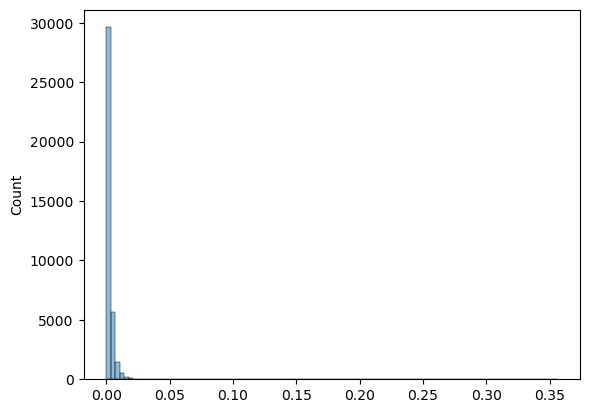

In [12]:
pagerank = nx.eigenvector_centrality(G)
print(pd.DataFrame.from_dict(pagerank,orient="index",columns=["clustering"]).describe())
sns.histplot(pagerank.values(),bins=100,legend=False)

Modularidad

In [ ]:
nx.modularity_spectrum

## Aprendizaje automático relacional: 3 enfoques

### Aprendizaje automático relacional con extracción manual de características

In [9]:
target

,id,name,ml_target
0,0,Eiryyy,0
1,1,shawflying,0
2,2,JpMCarrilho,1
3,3,SuhwanCha,0
4,4,sunilangadi2,1
...,...,...,...
37695,37695,shawnwanderson,1
37696,37696,kris-ipeh,0
37697,37697,qpautrat,0
37698,37698,Injabie3,1


### Aprendizaje automático con extracción automática de características (node2vect)

### Graph Neuronal Networks 